This is a model using LSTM

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas_datareader as get_web 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

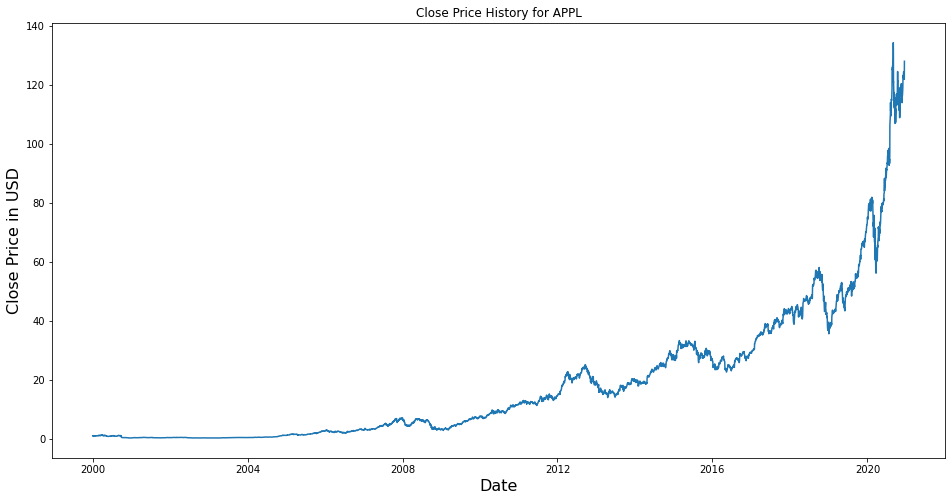

In [ ]:
#Getting the data needed for learning and testing, in this cases, we load the stock prices for Apple Inc.
stock_data_read = get_web.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end='2020-12-15')
stock_data_read.shape
#plot the close price of APPL stock
plt.figure(figsize = (16,8))
plt.title('Close Price History for APPL')
plt.plot(stock_data_read['Close'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price in USD',fontsize = 16)
plt.show()

In [ ]:
#Create a new data frame with only close price of APPL, and the new data frame is the type of NumPy array
orig_data = stock_data_read.filter(['Close'])
data = orig_data.values
training_data_len = math.ceil(len(data)*0.85) # only want to train 75% of the data
print(training_data_len)
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))#to scale the data within the range between 0 and 1
scaled_data = scaler.fit_transform(data)
print(scaled_data)

4483
[[0.00571244]
 [0.00508335]
 [0.00518334]
 ...
 [0.91212866]
 [0.90742522]
 [0.95296605]]


In [ ]:
# Create the scaled training data set
training_data = scaled_data[0:training_data_len,:]
# split the data set into x_train and y_train
x_train = []
y_train = []

for i in range(100,len(training_data)):
  x_train.append(training_data[i-100:i,0])# list of consecutive 100 prices
  y_train.append(training_data[i,0]) # list of prices excluding the first 100 prices
# set training data to be numpy arrays for training
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4383, 100, 1)

In [ ]:
 #Building the LSTM Models
model = Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)))# first layer
model.add(LSTM(60,return_sequences=False))# second layer
model.add(Dense(30))
model.add(Dense(1))
#Compile the model
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [ ]:
#Training begins
model.fit(x_train,y_train,batch_size=5,epochs = 100)

Epoch 1/100
877/877 [==============================] - 8s 9ms/step - loss: 5.0812e-06
Epoch 2/100
877/877 [==============================] - 8s 9ms/step - loss: 5.0327e-06
Epoch 3/100
877/877 [==============================] - 7s 9ms/step - loss: 4.7090e-06
Epoch 4/100
877/877 [==============================] - 8s 9ms/step - loss: 4.7471e-06
Epoch 5/100
877/877 [==============================] - 7s 9ms/step - loss: 4.8584e-06
Epoch 6/100
877/877 [==============================] - 7s 8ms/step - loss: 4.6224e-06
Epoch 7/100
877/877 [==============================] - 7s 8ms/step - loss: 4.6599e-06
Epoch 8/100
877/877 [==============================] - 7s 9ms/step - loss: 4.5848e-06
Epoch 9/100
877/877 [==============================] - 7s 8ms/step - loss: 4.8987e-06
Epoch 10/100
877/877 [==============================] - 8s 9ms/step - loss: 4.5356e-06
Epoch 11/100
877/877 [==============================] - 8s 9ms/step - loss: 4.7981e-06
Epoch 12/100
877/877 [==============================

In [ ]:
#Create a testing array for the rest of the data
test_data = scaled_data[training_data_len-100:,:]
#Create x_test and y_test
x_test = []
y_test = data[training_data_len:,:] # not scaled data
for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i,0])# list of consecutive 100 prices
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 

In [ ]:
#predict the price 
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [ ]:
#compare the prediction with the actual data with root mean squared error(RMSE)
rmse = np.sqrt(np.mean(pred - y_test)**2)
print(rmse)

1.2288530567024327


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


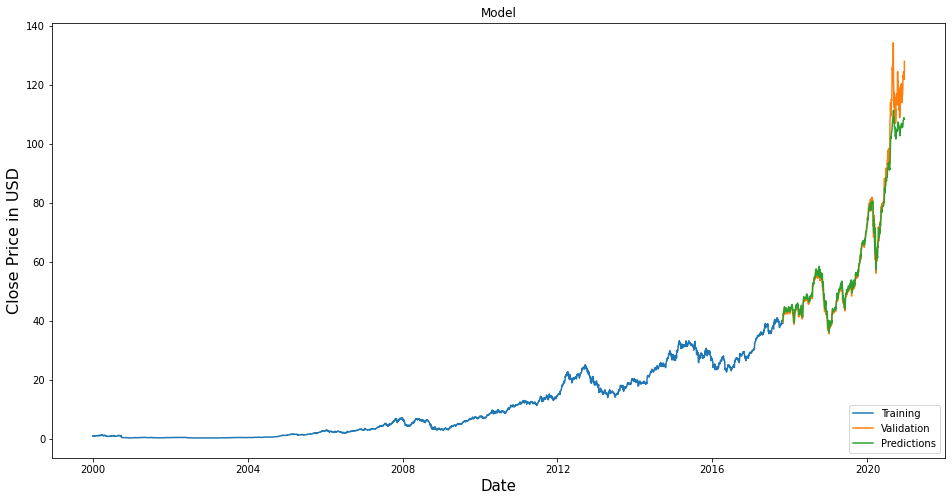

In [ ]:
#plot the data
train = orig_data[:training_data_len]
validation = orig_data[training_data_len:]
validation['prediction'] = pred

# visualization begins
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Close Price in USD',fontsize = 16)
plt.plot(train['Close'])
plt.plot(validation[['Close','prediction']])
plt.legend(['Training','Validation','Predictions'],loc = 'lower right')

In [ ]:
validation # compare the real data and preidcted data

,Close,prediction
Date,,
2017-10-26,39.352501,39.742313
2017-10-27,40.762501,40.000137
2017-10-30,41.680000,41.397686
2017-10-31,42.259998,42.209927
2017-11-01,41.722500,42.748207
...,...,...
2020-12-09,121.779999,108.710846
2020-12-10,123.239998,108.349121
2020-12-11,122.410004,108.534866


In [ ]:
quote = get_web.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end='2020-12-21')
new_orig_data = quote.filter(['Close'])
last_100_days = new_orig_data[-100:].values
last_100_days_scaled = scaler.fit_transform(last_100_days)
X_test = np.array([last_100_days_scaled ])
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
quote2 = get_web.DataReader('AAPL', data_source='yahoo', start='2020-12-22', end='2020-12-22')
real_price = quote2.filter(['Close']).values
print('Predicted Close Pirce of APPL at Dec. 22nd, 2020 is '+str(pred_price[0][0]) +', while the real stock is '+str(real_price[0][0]))

Predicted Close Pirce of APPL at Dec. 22nd, 2020 is 126.32152, while the real stock is 131.8800048828125
